# getting data.
[dataset from keggle](https://www.kaggle.com/datasets/anthonytherrien/tic-tac-toe-game-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./tic_tac_toe_training_data/tictactoe_games.csv')

df.tail(10)

,Winner,Move 1-X (Row-Col),Move 2-O (Row-Col),Move 3-X (Row-Col),Move 4-O (Row-Col),Move 5-X (Row-Col),Move 6-O (Row-Col),Move 7-X (Row-Col),Move 8-O (Row-Col),Move 9-X (Row-Col)
255158,X,2-2,2-1,2-0,1-2,1-1,0-0,1-0,0-1,0-2
255159,-,2-2,2-1,2-0,1-2,1-1,0-0,1-0,0-2,0-1
255160,X,2-2,2-1,2-0,1-2,1-1,0-1,1-0,0-0,0-2
255161,X,2-2,2-1,2-0,1-2,1-1,0-1,1-0,0-2,0-0
255162,-,2-2,2-1,2-0,1-2,1-1,0-2,0-1,0-0,1-0
255163,X,2-2,2-1,2-0,1-2,1-1,0-2,0-1,1-0,0-0
255164,-,2-2,2-1,2-0,1-2,1-1,0-2,1-0,0-0,0-1
255165,X,2-2,2-1,2-0,1-2,1-1,0-2,1-0,0-1,0-0
255166,X,2-2,2-1,2-0,1-2,1-1,1-0,0-1,0-0,0-2
255167,X,2-2,2-1,2-0,1-2,1-1,1-0,0-1,0-2,0-0


In [2]:
# replacing the column names to a personalized format
df.columns = ['winner','move-0','move-1','move-2', 'move-3','move-4','move-5', 'move-6','move-7','move-8']
df.tail(10)

,winner,move-0,move-1,move-2,move-3,move-4,move-5,move-6,move-7,move-8
255158,X,2-2,2-1,2-0,1-2,1-1,0-0,1-0,0-1,0-2
255159,-,2-2,2-1,2-0,1-2,1-1,0-0,1-0,0-2,0-1
255160,X,2-2,2-1,2-0,1-2,1-1,0-1,1-0,0-0,0-2
255161,X,2-2,2-1,2-0,1-2,1-1,0-1,1-0,0-2,0-0
255162,-,2-2,2-1,2-0,1-2,1-1,0-2,0-1,0-0,1-0
255163,X,2-2,2-1,2-0,1-2,1-1,0-2,0-1,1-0,0-0
255164,-,2-2,2-1,2-0,1-2,1-1,0-2,1-0,0-0,0-1
255165,X,2-2,2-1,2-0,1-2,1-1,0-2,1-0,0-1,0-0
255166,X,2-2,2-1,2-0,1-2,1-1,1-0,0-1,0-0,0-2
255167,X,2-2,2-1,2-0,1-2,1-1,1-0,0-1,0-2,0-0


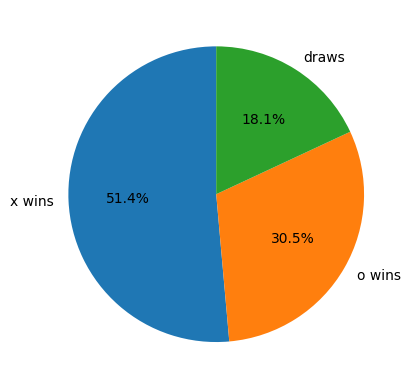

In [3]:
x_count = 0
o_count = 0
draw_count = 0

for index, row in df.iterrows():
    if row['winner'] == 'X':
        x_count += 1
    elif row['winner'] == 'O':
        o_count += 1
    elif row['winner'] == '-':
        draw_count += 1

fig, ax = plt.subplots()
ax.pie([x_count, o_count, draw_count], labels=['x wins', 'o wins', 'draws'], autopct='%1.1f%%', startangle=90)
plt.show()

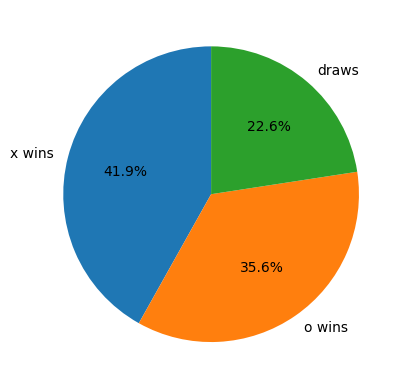

In [4]:
x_count = 0
o_count = 0
draw_count = 0

percentage = 0.20

# Bereken het aantal rijen
num_rows_to_drop = int(len(df) * percentage)

df_new_percentage = df.drop(df.iloc[:num_rows_to_drop].index)

for index, row in df_new_percentage.iterrows():
    if row['winner'] == 'X':
        x_count += 1
    elif row['winner'] == 'O':
        o_count += 1
    elif row['winner'] == '-':
        draw_count += 1

fig, ax = plt.subplots()
ax.pie([x_count, o_count, draw_count], labels=['x wins', 'o wins', 'draws'], autopct='%1.1f%%', startangle=90)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def train_test_validation_split(df, train_size=0.7,validation_size=0.5):
    trein, test = train_test_split(df, train_size=train_size, random_state=RANDOM_SEED)
    validation, test = train_test_split(test, train_size=validation_size, random_state=RANDOM_SEED)
    return trein, validation, test


In [6]:
x_winner_rows = df[df['winner'] == 'X']
o_winner_rows = df[df['winner'] == 'O']
draw_rows = df[df['winner'] == '-']

X_train, X_validation, X_test = train_test_validation_split(x_winner_rows)
O_train, O_validation, O_test = train_test_validation_split(o_winner_rows)
draw_train, draw_validation, draw_test = train_test_validation_split(draw_rows)

train = pd.concat([X_train, O_train, draw_train])
validation = pd.concat([X_validation, O_validation, draw_validation])
test = pd.concat([X_test, O_test, draw_test])



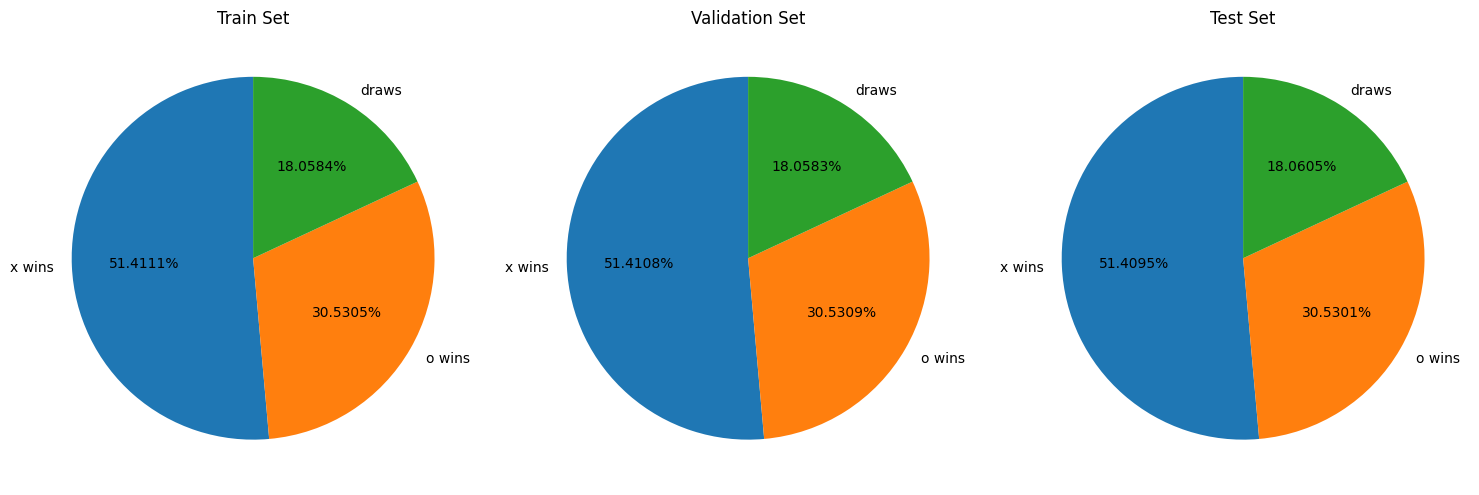

In [7]:
x_train_count = 0
o_train_count = 0
draw_train_count = 0
for index, row in train.iterrows():
    if row['winner'] == 'X':
        x_train_count += 1
    elif row['winner'] == 'O':
        o_train_count += 1
    elif row['winner'] == '-':
        draw_train_count += 1

x_validation_count = 0
o_validation_count = 0
draw_validation_count = 0
for index, row in validation.iterrows():
    if row['winner'] == 'X':
        x_validation_count += 1
    elif row['winner'] == 'O':
        o_validation_count += 1
    elif row['winner'] == '-':
        draw_validation_count += 1

x_test_count = 0
o_test_count = 0
draw_test_count = 0
for index, row in test.iterrows():
    if row['winner'] == 'X':
        x_test_count += 1
    elif row['winner'] == 'O':
        o_test_count += 1
    elif row['winner'] == '-':
        draw_test_count += 1

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].pie([x_train_count, o_train_count, draw_train_count], labels=['x wins', 'o wins', 'draws'], autopct='%1.4f%%', startangle=90)
ax[0].set_title('Train Set')
ax[1].pie([x_validation_count, o_validation_count, draw_validation_count], labels=['x wins', 'o wins', 'draws'], autopct='%1.4f%%', startangle=90)
ax[1].set_title('Validation Set')
ax[2].pie([x_test_count, o_test_count, draw_test_count], labels=['x wins', 'o wins', 'draws'], autopct='%1.4f%%', startangle=90)
ax[2].set_title('Test Set')
plt.tight_layout()
plt.show()

In [8]:
train.to_csv('./tic_tac_toe_training_data/train.csv', index=False)
validation.to_csv('./tic_tac_toe_training_data/validation.csv', index=False)
test.to_csv('./tic_tac_toe_training_data/test.csv', index=False)
print("Train, validation, and test sets created and saved successfully.")

Train, validation, and test sets created and saved successfully.


# processing the data so it is usable for the model

In [9]:
import pandas as pd
import numpy as np
import json

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

train = pd.read_csv('./tic_tac_toe_training_data/train.csv')
validation = pd.read_csv('./tic_tac_toe_training_data/validation.csv')
test = pd.read_csv('./tic_tac_toe_training_data/test.csv')

In [10]:
def prossess_data(df):
    states = []
    moves = []
    
    for index, df_row in df.iterrows():
        state = np.full((3, 3, 5), -1.0, dtype=np.float32)
        state[: ,: ,4] = 0
        
        for i in range(9):
            move = df_row.values[i+1]
            
            if move == '---':
                continue

            row, col = move.split('-')
            row, col = int(row), int(col)

            states.append(state.copy())

            moves.append(row * 3 + col)

            player = i % 2
            if player == 0:
                state[:, :, 1] = state[:, :, 0]
                state[:, :, 0] = 0
                state[row, col, 0] = 1
                state[: ,: ,4] = 1

            else:
                state[:, :, 3] = state[:, :, 2]
                state[:, :, 2] = 0
                state[row, col, 2] = 1
                state[: ,: ,4] = 0

    temp_df = pd.DataFrame({'states': states, 'moves': moves})
    temp_df['states'] = temp_df['states'].apply(lambda x: json.dumps(x.tolist()))
    return temp_df

In [11]:
train_data = prossess_data(train)

print(train_data.head(10))
train_data['states'].values[0]

                                              states  moves
0  [[[-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, ...      4
1  [[[0.0, -1.0, -1.0, -1.0, 1.0], [0.0, -1.0, -1...      2
2  [[[0.0, -1.0, 0.0, -1.0, 0.0], [0.0, -1.0, 0.0...      1
3  [[[0.0, 0.0, 0.0, -1.0, 1.0], [1.0, 0.0, 0.0, ...      5
4  [[[0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0...      3
5  [[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0...      6
6  [[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0...      7
7  [[[-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, ...      6
8  [[[0.0, -1.0, -1.0, -1.0, 1.0], [0.0, -1.0, -1...      8
9  [[[0.0, -1.0, 0.0, -1.0, 0.0], [0.0, -1.0, 0.0...      3


'[[[-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, -1.0, -1.0, 0.0]], [[-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, -1.0, -1.0, 0.0]], [[-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, -1.0, -1.0, 0.0]]]'

In [12]:
id = 5
print(train_data['states'].values[id])
print(train_data['moves'].values[id])

[[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0, 1.0]], [[1.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0, 1.0]], [[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 1.0]]]
6


In [13]:
validation_data = prossess_data(validation)
test_data = prossess_data(test)

In [14]:
train_data.to_csv('./tic_tac_toe_training_data/train_data_2.csv', sep=';', index=False)

In [15]:

validation_data.to_csv('./tic_tac_toe_training_data/validation_data_2.csv', sep=';', index=False)
test_data.to_csv('./tic_tac_toe_training_data/test_data_2.csv', sep=';', index=False)

# model training 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from WarmUpAndDecay import WarmUpAndDecay
import json

EPOCHS = 500
steps_per_epoch = 1000


In [2]:
test_data = pd.read_csv('./tic_tac_toe_training_data/test_data_2.csv', sep=';')
validation_data = pd.read_csv('./tic_tac_toe_training_data/validation_data_2.csv', sep=';')
train_data = pd.read_csv('./tic_tac_toe_training_data/train_data_2.csv', sep=';')

# hot incode the moves
def hot_encode_moves(df):
    df_encoded = pd.get_dummies(df['moves'], prefix='pos', dtype=float, sparse=True)
    df = pd.concat([df, df_encoded], axis=1)
    df.drop(columns=['moves'], inplace=True)
    df['states'] = df['states'].apply(lambda x: np.array(json.loads(x)))
    return df


train_data = hot_encode_moves(train_data)
validation_data = hot_encode_moves(validation_data)
test_data = hot_encode_moves(test_data)

train_data.head(10)

,states,pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8
0,"[[[-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, ...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,"[[[0.0, -1.0, -1.0, -1.0, 1.0], [0.0, -1.0, -1...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[[[0.0, -1.0, 0.0, -1.0, 0.0], [0.0, -1.0, 0.0...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[[[0.0, 0.0, 0.0, -1.0, 1.0], [1.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,"[[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,"[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,"[[[-1.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,"[[[0.0, -1.0, -1.0, -1.0, 1.0], [0.0, -1.0, -1...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,"[[[0.0, -1.0, 0.0, -1.0, 0.0], [0.0, -1.0, 0.0...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def build_model(state_shape =(3,3,5), n_actions=9, learning_rate = None, filter_size=16, num_res_blocks=2):
        """Build the Q-network model."""
        print(f"Building model with state shape: {state_shape} and action space: {n_actions}")
        
        inputs = tf.keras.Input(shape=state_shape, dtype=tf.float32)
        
        x = layers.Conv2D(filter_size, 3, padding='same', activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.1)(x)

        # create residual blocks to stableze thinking proces
        for _ in range(num_res_blocks):
            residual = x
            x = layers.Conv2D(filter_size, 3, padding='same', activation='relu')(x)
            x = layers.BatchNormalization()(x)
            x = layers.Conv2D(filter_size, 3, padding='same')(x)
            x = layers.BatchNormalization()(x)
            x = layers.Add()([x, residual])
            x = layers.Activation('relu')(x)
            x = layers.Dropout(0.15)(x)
        
        x = layers.Conv2D(2, 1, activation='relu')(x)
        x = layers.Flatten()(x)
        output = layers.Dense(n_actions, activation='softmax', name='policy_head')(x)
        
        model = tf.keras.Model(inputs=inputs, outputs=output)
        model.summary()
        
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model

total_steps = EPOCHS * steps_per_epoch

learning_rate = WarmUpAndDecay(
    base_lr= 0.0001,
    warmup_steps= int(total_steps * 0.5),
    decay_steps= int(total_steps * 2.5),
)

model = build_model(learning_rate=learning_rate)

# model = build_model(learning_rate=0.0001)

Building model with state shape: (3, 3, 5) and action space: 9
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 5)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 16)     736         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 16)    64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)             

In [4]:
train_x = np.stack(train_data['states'].values)
train_y = train_data.drop(columns=['states']).values

validation_x = np.stack(validation_data['states'].values)
validation_y = validation_data.drop(columns=['states']).values

model_history = model.fit(train_x, train_y, epochs=EPOCHS, steps_per_epoch=steps_per_epoch, validation_data=(validation_x, validation_y), validation_steps=(steps_per_epoch / 2))

Epoch 1/500
1000/1000 [==============================] - 13s 9ms/step - loss: 3.7928 - accuracy: 0.1117 - val_loss: 3.3020 - val_accuracy: 0.1122
Epoch 2/500
1000/1000 [==============================] - 8s 8ms/step - loss: 3.7128 - accuracy: 0.1120 - val_loss: 3.1883 - val_accuracy: 0.1121
Epoch 3/500
1000/1000 [==============================] - 9s 9ms/step - loss: 3.5703 - accuracy: 0.1121 - val_loss: 3.0194 - val_accuracy: 0.1113
Epoch 4/500
1000/1000 [==============================] - 8s 8ms/step - loss: 3.3828 - accuracy: 0.1125 - val_loss: 2.8339 - val_accuracy: 0.1122
Epoch 5/500
1000/1000 [==============================] - 8s 8ms/step - loss: 3.1761 - accuracy: 0.1126 - val_loss: 2.6571 - val_accuracy: 0.1140
Epoch 6/500
1000/1000 [==============================] - 9s 9ms/step - loss: 2.9722 - accuracy: 0.1134 - val_loss: 2.5041 - val_accuracy: 0.1160
Epoch 7/500
1000/1000 [==============================] - 9s 9ms/step - loss: 2.7848 - accuracy: 0.1138 - val_loss: 2.3858 - val_a

In [7]:
test_x = np.stack(test_data['states'].values)
test_y = test_data.drop(columns=['states']).values

test_loss, test_acc = model.evaluate(test_x,  test_y, steps=steps_per_epoch)

print('\nTest accuracy:', test_acc)

1000/1000 [==============================] - 3s 3ms/step - loss: 1.7934 - accuracy: 0.1965

Test accuracy: 0.19654937088489532


In [ ]:
import os
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M")
name = f"9x9_Go_low_dropout_2_{current_time}"
path = './output_models/base_models/'

os.makedirs(path, exist_ok=True)

savedmodel_path = os.path.join(path, name+ '.h5')

model.save(savedmodel_path, include_optimizer=True)
print(f"Model saved in HDF5 format at: {savedmodel_path}")

Model saved in HDF5 format at: ./output_models/base_models/9x9_Go_low_dropout_2_2025-06-11_17-28.h5
